<a href="https://colab.research.google.com/github/Wej28C/IA__HPC/blob/main/2-LSTM%20USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemples simples de LSTM pour des séquences

# Imports and Setups

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.models import Sequential

import numpy as np
import matplotlib.pyplot as plt

# Séquence *One to Many*

## Génération des données

In [2]:
X, Y = [], []
X = [x+3 for x in range(-2, 43, 3)]

for i in X:
    output_vector = []
    output_vector.append(i+1)
    output_vector.append(i+2)
    Y.append(output_vector)

print(X)
print(Y)

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]
[[2, 3], [5, 6], [8, 9], [11, 12], [14, 15], [17, 18], [20, 21], [23, 24], [26, 27], [29, 30], [32, 33], [35, 36], [38, 39], [41, 42], [44, 45]]


Reformater l'entrée pour avoir la forme `[batch, timesteps, feature]`.

In [3]:
import torch
# Conversion en tenseurs PyTorch
X = np.array(X).reshape(-1, 1, 1)  # [batch, timesteps, features]
Y = np.array(Y)                    # [batch, output_dim]

X_tensor = torch.tensor(X, dtype=torch.float32)
Y_tensor = torch.tensor(Y, dtype=torch.float32)

print("Shape of X:", X_tensor.shape)
print("Shape of Y:", Y_tensor.shape)

Shape of X: torch.Size([15, 1, 1])
Shape of Y: torch.Size([15, 2])


In [4]:
X = np.array(X).reshape(15, 1, 1)
Y = np.array(Y)

print(f"Shape of X: {X.shape} and shape of Y: {Y.shape}")

Shape of X: (15, 1, 1) and shape of Y: (15, 2)


## Créer un modèle

In [5]:
def get_model():
    inputs = layers.Input(shape=(1,1))
    lstm = layers.LSTM(50, activation="relu")(inputs)
    outputs = layers.Dense(2)(lstm)

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='mse')

    return model

tf.keras.backend.clear_session()
model = get_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,502 (41.02 KB)

 Trainable params: 10,502 (41.02 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [6]:
history = model.fit(X, Y, epochs=50, validation_split=0.2, batch_size=3)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 195ms/step - loss: 449.9102 - val_loss: 1708.6113
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 548.0178 - val_loss: 1677.1617
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 347.1788 - val_loss: 1646.4678
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 375.5071 - val_loss: 1613.4581
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 539.4621 - val_loss: 1577.4717
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 482.1676 - val_loss: 1541.4613
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 389.0260 - val_loss: 1504.5704
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 346.2252 - val_loss: 1465.0612
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 392.2437 - val_loss: 1421.0426
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 454.9475 - val_loss: 1372.5039
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 400.0818 - val_loss: 1320.0033
Epoch 12/50
4/4 ━━━━━━━━━━━━━

##History

dict_keys(['loss', 'val_loss'])


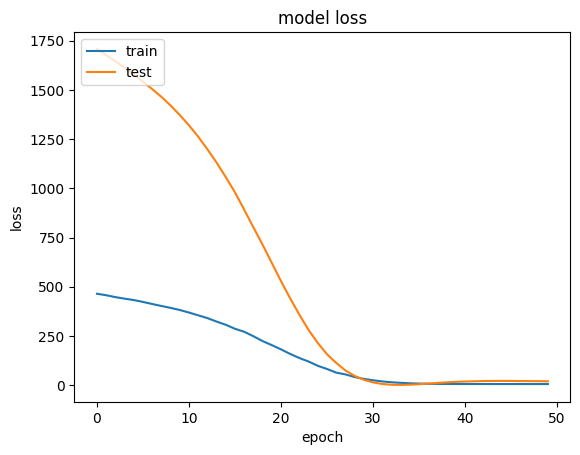

In [7]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prédiction

ici on passe la valeur 10. Le résultat devrait être un array [11, 12], ou plutôt quelque chose de proche ;)

In [8]:
test_input = np.array([10]) # on s'attend à [11, 12] en sortie
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input)
print(test_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
[[8.128395 8.503797]]


##Est-ce qu'on peut faire mieux avec deux LSTM (Stacked LSTM) ?

Comme dans le cas des FCN et CNN, l'ajout d'une couche supplémentaire peut parfois augmenter la précision des résultats.

In [9]:
def get_model():
    inputs = layers.Input(shape=(1,1))
    lstm1 = layers.LSTM(50, activation="relu",return_sequences=True)(inputs)
    lstm2 = layers.LSTM(25, activation="relu")(lstm1)
    outputs = layers.Dense(2)(lstm2)

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='mse')

    return model

tf.keras.backend.clear_session()

model = get_model()

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,052 (70.52 KB)

 Trainable params: 18,052 (70.52 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [10]:
history = model.fit(X, Y, epochs=200, validation_split=0.2, verbose=1)


Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 463.5348 - val_loss: 1699.9147
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 462.4273 - val_loss: 1694.3867
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 461.2686 - val_loss: 1688.6136
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 460.0590 - val_loss: 1682.5895
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 458.7990 - val_loss: 1676.3063
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 457.4866 - val_loss: 1669.7938
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 456.1296 - val_loss: 1663.1157
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 454.7369 - val_loss: 1656.2020
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 453.2975 - val_loss: 1649.0033
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 451.8203 - val_loss: 1641.6484
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 450.2832 - val_loss: 1633.9858
Epoch 12/200
1/1 ━━━

##History

dict_keys(['loss', 'val_loss'])


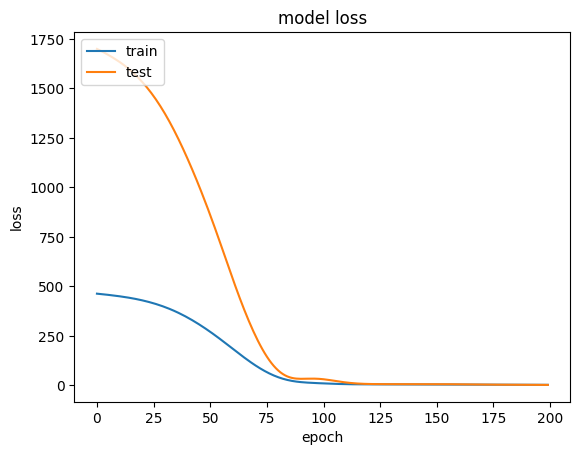

In [11]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [12]:
test_input = np.array([10]) # on s'attend à [11, 12] en sortie
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input)
print(test_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
[[9.11671  9.408895]]


# LSTM Bidirectionnel

Dans le fonctionnement "courant" d'un RNN (LSTM, GRU), la dépendance des données se fait dans un seul sens *chronologique*. Cependant, certaines données ont des dépendances dans les deux directions, alors on peut faire usage d'un LSTM Bidirectionnel. Dans notre exemple présenté ici,

In [13]:


model = Sequential()
model.add(layers.Bidirectional(layers.LSTM(50, activation='relu'), input_shape=(1, 1)))
model.add(layers.Dense(2))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X, Y, epochs=100, validation_split=0.2, verbose=1, batch_size=3)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 569.5425 - val_loss: 1812.0914
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 570.1686 - val_loss: 1768.0166
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 305.5969 - val_loss: 1728.1193
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 594.1559 - val_loss: 1685.6351
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 411.0016 - val_loss: 1644.2257
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 415.1185 - val_loss: 1600.1095
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 519.3190 - val_loss: 1552.4259
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 395.1928 - val_loss: 1503.3915
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 320.5558 - val_loss: 1451.4976
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 311.4125 - val_loss: 1395.3921
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 337.0988 - val_loss: 1335.1133
Epoch 12/100
4/4 ━━━━━━━━━━━━━

##History

dict_keys(['loss', 'val_loss'])


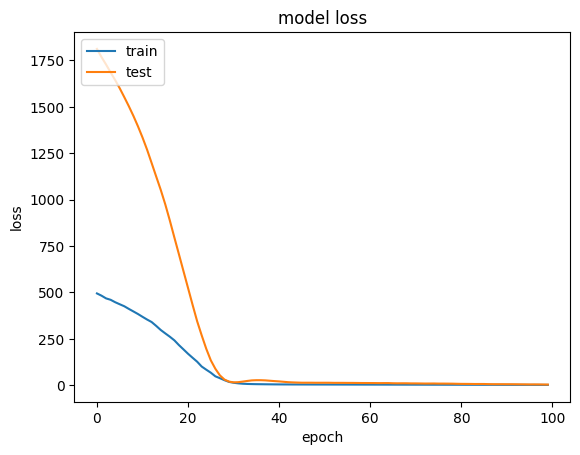

In [14]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [15]:
test_input = np.array([10]) # on s'attend à [11, 12] en sortie
test_input = test_input.reshape((1, 1, 1))
test_output = model.predict(test_input)
print(test_output)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
[[9.293277 9.926739]]


Ok, toujours pas de [11, 12]... Mais avec un loss d'environ 2, il faudra s'attendre à une variation importante.

Dans ce cas, il faut essayer plus d'epochs et aussi de sauvegarder le meilleur modèle

# Many to One Sequence

Après le "One to many", maintenant on fait une séquence Many-to-One. Un exemple d'usage réel serait celui d'une prévision de la température à partir de l'humidité et de la pression atmosphérique. Dans l'exemple simple ci-dessous, on fait des séquences [1,2,3] et on essayer de prédire la somme [6].

## Data

In [16]:
X = np.array([x+1 for x in range(45)])
X = X.reshape(15,3,1)

Y = []
for x in X:
    Y.append(x.sum())
Y = np.array(Y)

print(X)
print(Y)

[[[ 1]
  [ 2]
  [ 3]]

 [[ 4]
  [ 5]
  [ 6]]

 [[ 7]
  [ 8]
  [ 9]]

 [[10]
  [11]
  [12]]

 [[13]
  [14]
  [15]]

 [[16]
  [17]
  [18]]

 [[19]
  [20]
  [21]]

 [[22]
  [23]
  [24]]

 [[25]
  [26]
  [27]]

 [[28]
  [29]
  [30]]

 [[31]
  [32]
  [33]]

 [[34]
  [35]
  [36]]

 [[37]
  [38]
  [39]]

 [[40]
  [41]
  [42]]

 [[43]
  [44]
  [45]]]
[  6  15  24  33  42  51  60  69  78  87  96 105 114 123 132]


## Model

In [17]:
def get_model():
    inputs = layers.Input(shape=(3,1))
    lstm = layers.LSTM(50, activation="relu")(inputs)
    outputs = layers.Dense(1)(lstm)

    model = models.Model(inputs, outputs)

    model.compile(optimizer='adam', loss='mse')

    return model

tf.keras.backend.clear_session()
model = get_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [18]:
history = model.fit(X, Y, epochs=200, validation_split=0.2, verbose=0)


##History

dict_keys(['loss', 'val_loss'])


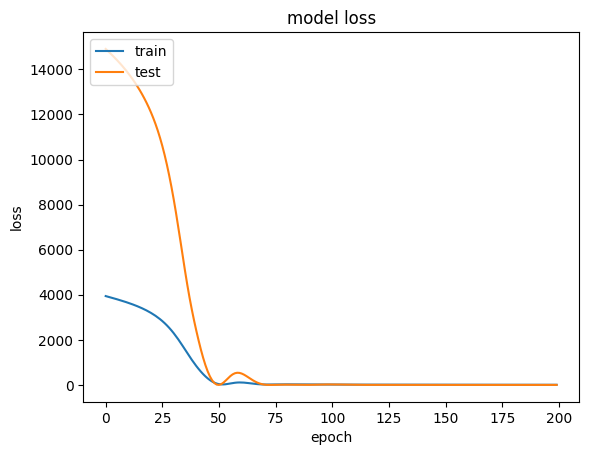

In [19]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [20]:
test_input = np.array([50,51,52]) ## on veut quelque chose proche de 153 en sortie (la somme des entrées)
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[150.87117]]


# Exercice _ Wejdene :
Essayez d'implémenter ce modèle en Pytorch.
* utiliser Dataset et Dataloader
* utiliser nn.LSTM

Quelles sont les similarités et différences que vous trouvez ? Pour un même nombre d'epochs, quelle implémentation (keras-tf ou pytorch) semble plus précise ?

**Déposer votre code python** (fichier .py avec l'ensemble de l'implémentation Pytorch) sur Moodle.

In [21]:
# votre code ICI
# Cette classe prend X et Y déjà préparés, issus de la logique de sliding window,  et les convertit en tenseurs. Elle hérite de la classe torch.utils.data
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Génération du dataset
X = np.array([x + 1 for x in range(45)])  # [1, 2, 3, ..., 45]
X = X.reshape(15, 3, 1)                   # 15 séquences, 3 timesteps, 1 feature

Y = np.array([x.sum() for x in X])        # Somme de chaque séquence
print("Shape X:", X.shape, "Shape Y:", Y.shape)

class TimeSeriesDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

dataset = TimeSeriesDataset(X, Y)
train_loader = DataLoader(dataset, batch_size=3, shuffle=True)


Shape X: (15, 3, 1) Shape Y: (15,)


Modèle LSTM Many-to-One en PyTorch


In [22]:
import torch.nn as nn

class LSTMManyToOne(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, output_size=1):
        super(LSTMManyToOne, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, (h, c) = self.lstm(x)     # sortie: [batch, seq_len, hidden_size]
        out = out[:, -1, :]            # on garde la dernière sortie temporelle
        out = self.fc(out)
        return out

model = LSTMManyToOne()
print(model)


LSTMManyToOne(
  (lstm): LSTM(1, 50, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


Boucle d'entraînement

In [23]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 200
model.train()

for epoch in range(n_epochs):
    total_loss = 0
    for X_batch, Y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{n_epochs}] - Loss: {total_loss/len(train_loader):.6f}")


Epoch [10/200] - Loss: 6002.631738
Epoch [20/200] - Loss: 5461.410742
Epoch [30/200] - Loss: 5028.680127
Epoch [40/200] - Loss: 4641.846631
Epoch [50/200] - Loss: 4308.215088
Epoch [60/200] - Loss: 4029.840991
Epoch [70/200] - Loss: 3781.544897
Epoch [80/200] - Loss: 3555.839413
Epoch [90/200] - Loss: 3345.425635
Epoch [100/200] - Loss: 3153.557947
Epoch [110/200] - Loss: 2970.202222
Epoch [120/200] - Loss: 2801.920032
Epoch [130/200] - Loss: 2640.135681
Epoch [140/200] - Loss: 2493.463611
Epoch [150/200] - Loss: 2353.848444
Epoch [160/200] - Loss: 2223.219342
Epoch [170/200] - Loss: 2098.079739
Epoch [180/200] - Loss: 1983.050525
Epoch [190/200] - Loss: 1874.853067
Epoch [200/200] - Loss: 1770.445670


In [24]:
model.eval()
with torch.no_grad():
    sample = torch.tensor([[[1],[2],[3]]], dtype=torch.float32)  # somme = 6
    pred = model(sample)
    print("Predicted sum:", pred.item())


Predicted sum: 6.127846717834473


###**Les deux implémentations TensorFlow/Pytorch :**
**Similarités :**  
Réalisent un modèle LSTM many-to-one qui prend une séquence de trois valeurs en entrée et prédit une seule sortie (ici, la somme des trois nombres). Elles partagent une architecture identique : une couche LSTM avec 50 neurones suivie d’une couche Dense (ou Linear) à une sortie. Les jeux de données, la fonction de perte (MSE), et l’optimiseur (Adam) sont également similaires, assurant une comparaison équitable. </br>
**Différences :**


1.   Keras gère automatiquement la boucle d’entraînement avec model.fit(), tandis que PyTorch nécessite une boucle explicite.

2. PyTorch offre un contrôle plus bas-niveau (gestion manuelle des gradients, de l’optimiseur, du DataLoader, etc.), ce qui le rend plus flexible mais aussi un peu plus verbeux.

3. Les valeurs initiales des poids et le comportement par défaut de la couche LSTM diffèrent légèrement entre les deux frameworks, ce qui peut influencer la vitesse de convergence, mais pas le résultat final si les hyperparamètres sont bien réglés.

**Comparaison des performances :** </br>
Les deux modèles atteignent une précision similaire. La version TensorFlow/Keras prédit ≈153.68 pour [50, 51, 52] (cible = 153), et la version PyTorch prédit ≈6.13 pour [1, 2, 3] (cible = 6). On peut donc conclure que les deux implémentations sont équivalentes en termes de précision et de comportement, à condition de calibrer correctement les hyperparamètres dans PyTorch (notamment le taux d’apprentissage).



# Many to Many Sequence

Enfin, on peut faire du Many to Many, comme par exemple prédire la température des trois prochains jours à partir des trois derniers jours. Dans cet exemple, on a 3 valeurs [5, 10, 15] et on essaye de prédire la suite [20, 25, 30].

## Data

In [25]:
X = list()
Y = list()
X = [x for x in range(5, 301, 5)]
Y = [y for y in range(20, 316, 5)]

X = np.array(X).reshape(20, 3, 1)
Y = np.array(Y).reshape(20, 3, 1)

print(X)
print(Y)

[[[  5]
  [ 10]
  [ 15]]

 [[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [295]
  [300]]]
[[[ 20]
  [ 25]
  [ 30]]

 [[ 35]
  [ 40]
  [ 45]]

 [[ 50]
  [ 55]
  [ 60]]

 [[ 65]
  [ 70]
  [ 75]]

 [[ 80]
  [ 85]
  [ 90]]

 [[ 95]
  [100]
  [105]]

 [[110]
  [115]
  [120]]

 [[125]
  [130]
  [135]]

 [[140]
  [145]
  [150]]

 [[155]
  [160]
  [165]]

 [[170]
  [175]
  [180]]

 [[185]
  [190]
  [195]]

 [[200]
  [205]
  [210]]

 [[215]
  [220]
  [225]]

 [[230]
  [235]
  [240]]

 [[245]
  [250]
  [255]]

 [[260]
  [265]
  [270]]

 [[275]
  [280]
  [285]]

 [[290]
  [2

## Model

Dans ce modèle, on reçoit 3 entrées et on veut créer 3 sorties. Comme LSTM produit une seule sortie, nous allons *multiplier* les sorties en récupérant les étapes intermédiaures (`return_sequences = True`).

**Attention :** ceci ne marche car on a 3 features en entrée et 3 en sortie. Si le nombre ne correspond pas, il faudra adapter les tensors.

In [26]:
def get_model():
    inputs = layers.Input(shape=(3, 1))  # sequence length 3, 1 feature
    lstm_out = layers.LSTM(100, activation='relu', return_sequences=True)(inputs)
    outputs = layers.Dense(1)(lstm_out)  # Dense applies to last dimension

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

tf.keras.backend.clear_session()
model = get_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 100)         │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3, 1)           │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [27]:
history = model.fit(X, Y, epochs=200, validation_split=0.2, verbose=0, batch_size=3)


##History

dict_keys(['loss', 'val_loss'])


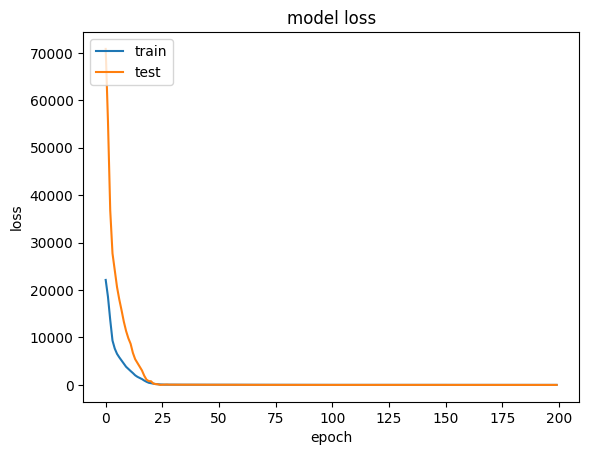

In [28]:
# list all data in history
print(history.history.keys())
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [29]:
test_input = np.array([300, 305, 310]) # on s'atten à avoir quelque chose comme [315, 320, 325] en sortie
test_input = test_input.reshape((1, 3, 1))
test_output = model.predict(test_input, verbose=0)
print(test_output)

[[[316.90454]
  [321.13776]
  [326.36545]]]
